In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import patsy
import scipy.stats as stats
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
W20 = pd.read_csv("WCD-20W-Legs.csv")
F19 = pd.read_csv("WCD-19F-Legs.csv")
S19 = pd.read_csv("WCD-19S-Legs.csv")
W19 = pd.read_csv("WCD-19W-Legs.csv")
F18 = pd.read_csv("WCD-18F-Legs.csv")
S18 = pd.read_csv("WCD-18S-Legs.csv")
W18 = pd.read_csv("WCD-18W-Legs.csv")
F17 = pd.read_csv("WCD-17F-Legs.csv")
S17 = pd.read_csv("WCD-17S-Legs.csv")
W17 = pd.read_csv("WCD-17W-Legs.csv")
F16 = pd.read_csv("WCD-16F-Legs.csv")
S16 = pd.read_csv("WCD-16S-Legs.csv")

In [40]:
each = [W20, F19, S19, W19, F18, S18, W18, F17, S17, W17, 
                   F16, S16]

In [5]:
WNT = WCD_All_Seasons[0]

In [6]:
WT = WNT['Date']

In [11]:
WN = []
for date in WT:
    WN.append(date)

In [14]:
import dateutil.parser

In [15]:
def to_date(dateobj):
    date = dateutil.parser.parse(dateobj)
    return date

In [16]:
for date in WN:
    to_date(date)

In [22]:
WN[0]

'1/21/20'

In [21]:
WT[0]

'1/21/20'

In [25]:
for season in WCD_All_Seasons:
    RLDT = []
    xdt = season['Date']
    for date in xdt:
        rdt = to_date(date)
        RLDT.append(rdt)
    
    season['TrueDate'] = RLDT

In [26]:
W = W20['TrueDate']

In [27]:
type(W)

pandas.core.series.Series

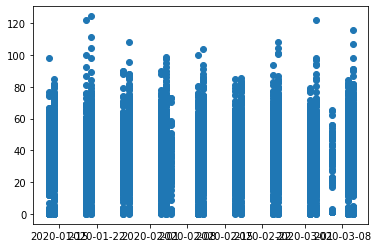

In [29]:
plt.scatter(W20['TrueDate'],W20['3DA'])

In [74]:
WCD_All_Legs = []
for season in WCD_All_Seasons:
    WCD_All_Legs.append(season)

In [75]:
All_Legs = pd.concat(WCD_All_Legs)

In [76]:
All_Legs.reset_index()

,index,Unnamed: 0,Date,Team,Player,Leg Code,Game,3DA,W/A,TrueDate,Season_Day
0,0,55,1/21/20,Silver Bullet Boys,Jake Erhardt,7.2,301 DIDO,124.5,W,2020-01-21 00:00:00,8 days
1,1,11,", 3-3-20",Bullshidartists,Tom Shields,2.2,301 DIDO,122.4,W,2020-03-03 00:00:00,50 days
2,2,58,1/20/20,140 Darts,Jimmy Stathopoulos,9.1,501 SIDO,122.0,A,2020-01-20 00:00:00,7 days
3,3,1,3/10/20,N.W.O.,Brian Fenlon,1.1,501 SIDO,115.6,W,2020-03-10 00:00:00,57 days
4,4,63,1/21/20,Cork Busters,Liz Tynan,9.1,501 SIDO,111.3,A,2020-01-21 00:00:00,8 days
...,...,...,...,...,...,...,...,...,...,...,...
150322,5613,40,7/12/16,Be Somebody!,Brad Bouxsein,7.2,301 DIDO,0.0,0,2016-07-12 00:00:00,NaT
150323,5614,41,7/12/16,Be Somebody!,Andrew Balfe,7.2,301 DIDO,0.0,0,2016-07-12 00:00:00,NaT
150324,5615,22,7/12/16,Dart Team,Jay Small,3.3,301 DIDO,0.0,0,2016-07-12 00:00:00,NaT
150325,5616,44,7/26/16,The Thatch Pub,Brian McKay,7.1,301 DIDO,0.0,0,2016-07-26 00:00:00,NaT


In [33]:
All_Legs.to_csv('WCD_All_Legs.csv')

In [34]:
All_Cricket = All_Legs.where(All_Legs['Game'] == 'Cricket')

array([[<AxesSubplot:title={'center':'3DA'}>]], dtype=object)

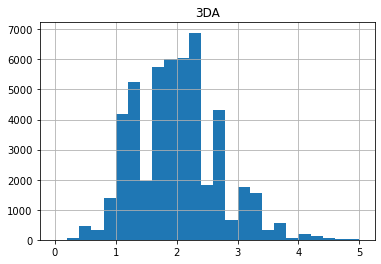

In [221]:
All_Cricket.hist('3DA', bins=25, range=[0,5])

In [222]:
All_Cricket.to_csv('All_Cricket.csv')

In [223]:
All_Cricket.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150327 entries, 0 to 5617
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  49913 non-null  float64
 1   Date        49913 non-null  object 
 2   Team        49913 non-null  object 
 3   Player      49913 non-null  object 
 4   Leg Code    49913 non-null  float64
 5   Game        49913 non-null  object 
 6   3DA         49913 non-null  float64
 7   W/A         49913 non-null  object 
 8   TrueDate    49913 non-null  object 
dtypes: float64(3), object(6)
memory usage: 11.5+ MB


In [41]:
min(W20['TrueDate'])

Timestamp('2020-01-13 00:00:00')

In [217]:
def seasonindex(season):
    SeasonOpen = min(season['TrueDate'])
    SeasonClose = max(season['TrueDate'])
    SeaInd = []
    for date in season['TrueDate']:
        days = date - SeasonOpen
        SeaInd.append(days.days)
    season['Season_Day'] = SeaInd
    sealen = (SeasonClose - SeasonOpen).days
    print("Season is", sealen, "days long")

In [218]:
(W20.iloc[5]['TrueDate'] - min(W20['TrueDate'])).days

43

In [219]:
seasonindex(F19)

Season is 734104 days long


In [268]:
seacount = 0

for season in each[::-1]:
    seacount += 1
    season['TeamSeason'] = season['Team'] + str(seacount)

In [284]:
for season in each:
    
    season['Wins'] = (season['W/A'] != '0')

In [285]:
W20.tail(20)

,Unnamed: 0,Date,Team,Player,Leg Code,Game,3DA,W/A,TrueDate,Season_Day,TeamSeason,Wins
12700,8,2/10/20,Never Convicted,Jim Simpson,2.1,301 DIDO,0.0,0,2020-02-10,28,Never Convicted12,False
12701,9,2/10/20,Never Convicted,Brian Cunningham,2.1,301 DIDO,0.0,0,2020-02-10,28,Never Convicted12,False
12702,51,2/10/20,Never Convicted,Josh Batterman,7.1,301 DIDO,0.0,0,2020-02-10,28,Never Convicted12,False
12703,34,", 3-9-20",Big Wayne,Terry White,5.1,301 DIDO,0.0,0,2020-03-09,56,Big Wayne12,False
12704,31,1/13/20,Never Convicted,Josh Batterman,6.1,301 DIDO,0.0,0,2020-01-13,0,Never Convicted12,False
12705,7,2/10/20,What Practice?,Pete Penkala,2.1,301 DIDO,0.0,0,2020-02-10,28,What Practice?12,False
12706,6,", 3-9-20",Happy Accident,Daniel McGinly,2.1,301 DIDO,0.0,0,2020-03-09,56,Happy Accident12,False
12707,7,", 3-9-20",Happy Accident,Matt Cremeens,2.1,301 DIDO,0.0,0,2020-03-09,56,Happy Accident12,False
12708,13,", 2-5-20",Dix Throwing Stix,David Dohr Jr,2.2,301 DIDO,0.0,0,2020-02-05,23,Dix Throwing Stix12,False
12709,34,2/24/20,Dix Throwing Stix,Brian Ernst,5.1,301 DIDO,0.0,0,2020-02-24,42,Dix Throwing Stix12,False


In [226]:
for season in each:
    seasonindex(season)

Season is 57 days long
Season is 734104 days long
Season is 134 days long
Season is 85 days long
Season is 733734 days long
Season is 116 days long
Season is 85 days long
Season is 733340 days long
Season is 99 days long
Season is 85 days long
Season is 732949 days long
Season is 99 days long


In [227]:
IndSeas = [W20, S19, W19, S18, W18, S17, W17, S16]
FallSeas = [F19, F18, F17, F16]

In [286]:
IndCricket = []
for season in IndSeas:
    crick = season.where(season['Game'] == 'Cricket')
    IndCricket.append(crick)

In [287]:
IndCrick = pd.concat(IndCricket)

In [288]:
IndCrick.dropna()

,Unnamed: 0,Date,Team,Player,Leg Code,Game,3DA,W/A,TrueDate,Season_Day,TeamSeason,Wins
8337,27.0,1/14/20,Bullshidartists,David Trimble Jr,4.2,Cricket,5.7,A,2020-01-14,1.0,Bullshidartists12,1.0
8344,33.0,", 3-2-20",140 Darts,Sam Morgan,4.3,Cricket,5.1,W,2020-03-02,49.0,140 Darts12,1.0
8345,11.0,", 3-3-20",Fighting Fish,CJ Llamedo,2.2,Cricket,5.1,W,2020-03-03,50.0,Fighting Fish12,1.0
8347,10.0,", 3-2-20",Never Convicted,Brian Cunningham,2.2,Cricket,5.0,W,2020-03-02,49.0,Never Convicted12,1.0
8348,11.0,", 3-2-20",Never Convicted,Fred Lundgren,2.2,Cricket,5.0,A,2020-03-02,49.0,Never Convicted12,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5580,32.0,5/24/16,DWI Rockahula,Diane O'Malley,4.3,Cricket,0.5,0,2016-05-24,15.0,DWI Rockahula1,0.0
5581,7.0,", 8-9-16",FTW!,Melody Foley,2.1,Cricket,0.5,0,2016-08-09,92.0,FTW!1,0.0
5582,21.0,6/14/16,Motley Crew,Ken Molitoris,4.2,Cricket,0.4,A,2016-06-14,36.0,Motley Crew1,1.0
5583,29.0,6/14/16,Motley Crew,Ken Molitoris,6.1,Cricket,0.3,0,2016-06-14,36.0,Motley Crew1,0.0


In [291]:
IndCrick.groupby(['TeamSeason']).mean()

,Unnamed: 0,Leg Code,3DA,Season_Day,Wins
TeamSeason,,,,,
1's Are Closed1,30.166667,4.814706,2.041176,48.431373,0.578431
1's Are Closed3,31.541667,5.145833,1.941667,51.722222,0.444444
140 Darts10,31.890323,5.004516,2.115484,49.070968,0.574194
140 Darts12,31.577465,5.163380,2.284507,32.239437,0.492958
140 Darts3,30.686957,4.968696,2.420000,55.965217,0.678261
...,...,...,...,...,...
Wolfpack12,32.324074,5.007407,1.897222,28.907407,0.388889
Wolfpack6,30.623853,5.002752,2.062385,37.311927,0.623853
Wolfpack7,31.311688,5.096104,2.162338,46.909091,0.415584


In [290]:
IndCrick.to_csv("WCD_TeamS_Cricket.csv")

In [242]:
plt.bar(W20C['Season_Day'],W20C['3DA'].mean())

SyntaxError: invalid syntax (<ipython-input-242-59e7a9b254b9>, line 1)

In [233]:
W20C.dropna()

,Unnamed: 0,Date,Team,Player,Leg Code,Game,3DA,W/A,TrueDate,Season_Day
8337,27.0,1/14/20,Bullshidartists,David Trimble Jr,4.2,Cricket,5.7,A,2020-01-14,1.0
8344,33.0,", 3-2-20",140 Darts,Sam Morgan,4.3,Cricket,5.1,W,2020-03-02,49.0
8345,11.0,", 3-3-20",Fighting Fish,CJ Llamedo,2.2,Cricket,5.1,W,2020-03-03,50.0
8347,10.0,", 3-2-20",Never Convicted,Brian Cunningham,2.2,Cricket,5.0,W,2020-03-02,49.0
8348,11.0,", 3-2-20",Never Convicted,Fred Lundgren,2.2,Cricket,5.0,A,2020-03-02,49.0
...,...,...,...,...,...,...,...,...,...,...
12645,11.0,1/20/20,I'm Out !,Rob Norwick,2.2,Cricket,0.3,0,2020-01-20,7.0
12646,21.0,", 3-9-20",Never Convicted,Josh Batterman,3.2,Cricket,0.3,0,2020-03-09,56.0
12647,45.0,1/13/20,Thorns,Vicki Johnson,6.2,Cricket,0.3,0,2020-01-13,0.0
12648,13.0,1/27/20,What Practice?,John Luczak,2.2,Cricket,0.3,0,2020-01-27,14.0


In [240]:
W20Crick = W20C.groupby(['Season_Day','Team']).mean()
W20Crick.reset_index()

,Season_Day,Team,Unnamed: 0,Leg Code,3DA
0,0.0,Baywatch,32.000000,5.792308,1.330769
1,0.0,Best Friends,29.000000,4.853846,1.553846
2,0.0,Big Wayne,26.928571,5.385714,1.928571
3,0.0,Dix Throwing Stix,29.666667,5.225000,1.658333
4,0.0,Drifters,35.500000,5.110000,1.930000
...,...,...,...,...,...
363,57.0,Silver Bullet Boys,32.700000,5.080000,2.070000
364,57.0,Team Fireball,34.000000,4.950000,1.650000
365,57.0,The Deuce,34.307692,5.484615,2.076923
366,57.0,Ton-9 Messengers,35.666667,4.950000,2.025000


In [243]:
W20Crick

Unnamed: 0  Leg Code       3DA
Season_Day Team                                              
0.0        Baywatch             32.000000  5.792308  1.330769
           Best Friends         29.000000  4.853846  1.553846
           Big Wayne            26.928571  5.385714  1.928571
           Dix Throwing Stix    29.666667  5.225000  1.658333
           Drifters             35.500000  5.110000  1.930000
...                                   ...       ...       ...
57.0       Silver Bullet Boys   32.700000  5.080000  2.070000
           Team Fireball        34.000000  4.950000  1.650000
           The Deuce            34.307692  5.484615  2.076923
           Ton-9 Messengers     35.666667  4.950000  2.025000
           Turd Ferguson's      29.000000  4.744444  1.566667

[368 rows x 3 columns]

<AxesSubplot:xlabel='Season_Day', ylabel='3DA'>

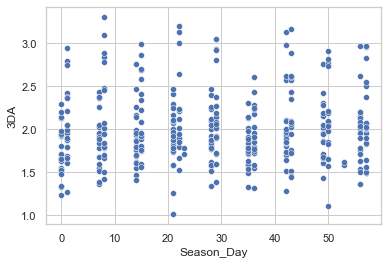

In [262]:
sns.set_theme(style="whitegrid")
sns.scatterplot(x="Season_Day", y="3DA",
             data=W20Crick)

In [235]:
def teamavg(teamseason):
    teamseason = []
    for teamwk in teamseason:
        teamseason.append([teamwk['Season_Day'], teamwk['Team'], teamwk['3DA']])
    return teamseason

[]

<AxesSubplot:xlabel='Season_Day', ylabel='3DA'>

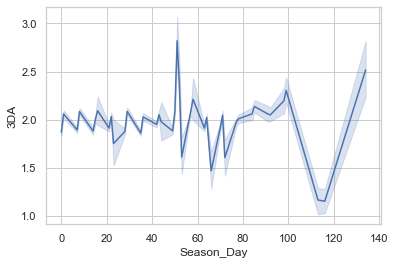

In [258]:
sns.set_theme(style="whitegrid")
sns.lineplot(x="Season_Day", y="3DA",
             data=IndCrick)

In [238]:
W20Crick['Season_Day']

KeyError: 'Season_Day'

In [178]:
W20Crick.reset_index()
W20Cricke = pd.df{
            "Day" 
}

KeyError: 1